In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/uk-housing-prices-paid/price_paid_records.csv


# House Price Analysis- England & Wales


## Objectives:

- Investigate overall trends for house prices in England and Wales over a 10 year period, 2006-2016.

- Identify property hotspots from this period (areas with the greatest increase in price), counties and town/cities.

## Actions:

- Inspect the dataset

- Cleanse the dataset to make it more useable, this is especially important as it is such a large file, I will need to remove all unneccessary columns in order to process it efficiently.

- Complete the objective using calculations and display the outcomes as attractive and easy to understand visualisations.

## About The Data:

The data used is a csv file from Kaggle, the data is sourced from HM Land Registry and was released under Open Government License 3.0. 

This is a large dataset with 22489348 rows. Each row is an individual transaction, containing Price Paid data for England and Wales between 1995 and 2017.

## Inspecting the Data

In [2]:
#import packages and data
import pandas as pd
df = pd.read_csv(r'/kaggle/input/uk-housing-prices-paid/price_paid_records.csv')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='deep')
import numpy as np
import warnings
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
#see all column names
pd.set_option('display.max_columns', None)


In [3]:
#check the head of the df
df.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A


In [4]:
#check the size of the df (rows, columns)
df.shape

(22489348, 11)

In [5]:
#check the column names to see if all are relevant to this analysis
df.columns

Index(['Transaction unique identifier', 'Price', 'Date of Transfer',
       'Property Type', 'Old/New', 'Duration', 'Town/City', 'District',
       'County', 'PPDCategory Type', 'Record Status - monthly file only'],
      dtype='object')

In [6]:
#Check the sum of NaN entries in each column, the dataset is complete, thanks HMLR
df.isna().sum()

Transaction unique identifier        0
Price                                0
Date of Transfer                     0
Property Type                        0
Old/New                              0
Duration                             0
Town/City                            0
District                             0
County                               0
PPDCategory Type                     0
Record Status - monthly file only    0
dtype: int64

In [7]:
#Check for any duplicate rows, TUI is a good column to indicate this
df['Transaction unique identifier'].duplicated().any()

False

In [8]:
#Check data types by column, it would be useful if 'Date of Transfer' was in pandas datetime format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22489348 entries, 0 to 22489347
Data columns (total 11 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   Transaction unique identifier      object
 1   Price                              int64 
 2   Date of Transfer                   object
 3   Property Type                      object
 4   Old/New                            object
 5   Duration                           object
 6   Town/City                          object
 7   District                           object
 8   County                             object
 9   PPDCategory Type                   object
 10  Record Status - monthly file only  object
dtypes: int64(1), object(10)
memory usage: 1.8+ GB


# Data Cleansing


In [9]:
#Make a copy to keep the original df intact in case it is required later on
df1=df.copy()

In [10]:
#Drop property type 0, this is like a misc type of property and is likely to contain outliers which could skew, also dropping Flats/Maisonettes as the brief is to investigate house prices, not overall property prices

df1 = df1[df1['Property Type'] != 'O']
df1 = df1[df1['Property Type'] != 'F']

#Drop columns 1, 3, 4, 5, 9 and 10 as they are not relevant this time
columns_to_drop= ['Transaction unique identifier', 'District', 'Old/New',  'Duration', 'PPDCategory Type', 'Record Status - monthly file only']
df1=df1.drop(columns=columns_to_drop)
#There is a slight mismatch with spelling St. St so I have replaced one
df1.replace(to_replace='Chalfont St. Giles', value= 'Chalfont St Giles', inplace=True)

In [11]:
#Convert the date of transfer column to a pandas datetime type for easier'
df1['Date of Transfer'] = pd.to_datetime(df1['Date of Transfer'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18305356 entries, 0 to 22489347
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Price             int64         
 1   Date of Transfer  datetime64[ns]
 2   Property Type     object        
 3   Town/City         object        
 4   County            object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 838.0+ MB


In [12]:
#Create a numerical column for year of transfer
df1['Year of Transfer'] = pd.to_datetime(df1['Date of Transfer']).dt.year

In [13]:
#Remove all values from outside of the time period required, 2006-2016, also resetting the index on this slice of data
df1 = df1[(df1['Year of Transfer'] >= 2006) & (df1['Year of Transfer'] <= 2016)]
df1 = df1.reset_index(drop=True)
df1.head()

,Price,Date of Transfer,Property Type,Town/City,County,Year of Transfer
0,249950,2006-01-27,D,NOTTINGHAM,NOTTINGHAMSHIRE,2006
1,150000,2006-08-02,T,SOUTHAM,WARWICKSHIRE,2006
2,124000,2006-06-09,S,NOTTINGHAM,NOTTINGHAMSHIRE,2006
3,118000,2006-12-08,S,CARDIFF,CARDIFF,2006
4,119950,2006-07-31,S,MANCHESTER,GREATER MANCHESTER,2006


# House Prices: Overall Trends

This section contains visualisations that show the overall trends for house prices in England & Wales between 2006 and 2016. 

To provide a succint overview, I chose to calculate the following:

- How the overall average house price for Engand and Wales has changed over time

- How the average house price for Engand and Wales has changed over time by house type (detached, semi-detached and terraced)

- The counties with the highest average house price for the 10 year period

- The counties with the lowest average house price for the 10 year period

- The towns/cities with the highest average house price for the 10 year period

- The towns/cities with the lowest average house price for the 10 year period

I have made these as clear and accessible as possible, putting a lot of consideration into which type of graph is most appropriate and easy to understand.

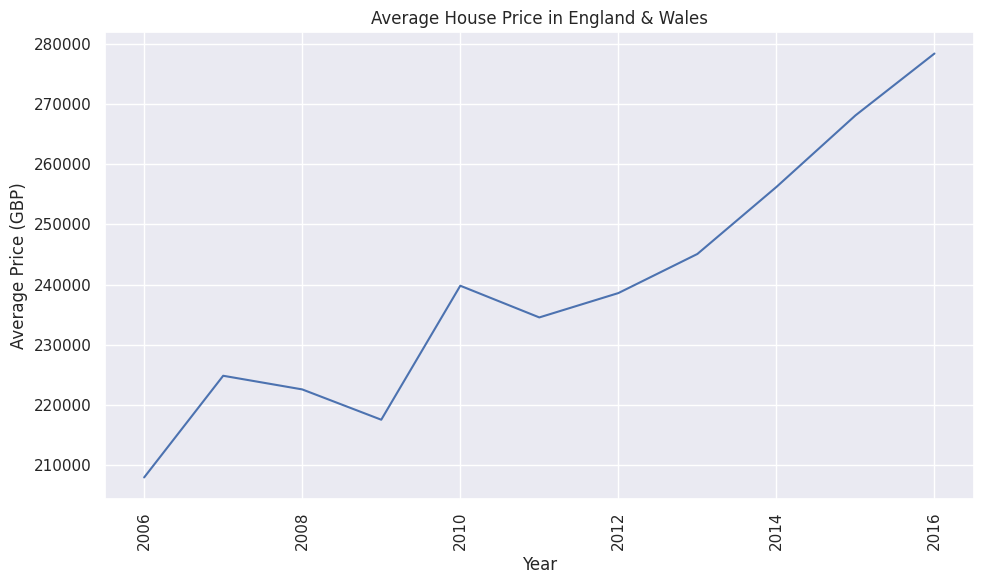

In [50]:
#get rid of an error message
warnings.filterwarnings("ignore", category=FutureWarning)

# Group the data by year and find the average price for the year
av_price = df1.groupby('Year of Transfer')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=av_price, x='Year of Transfer', y='Price')
plt.title('Average House Price in England & Wales')
plt.xlabel('Year')
plt.ylabel('Average Price (GBP)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

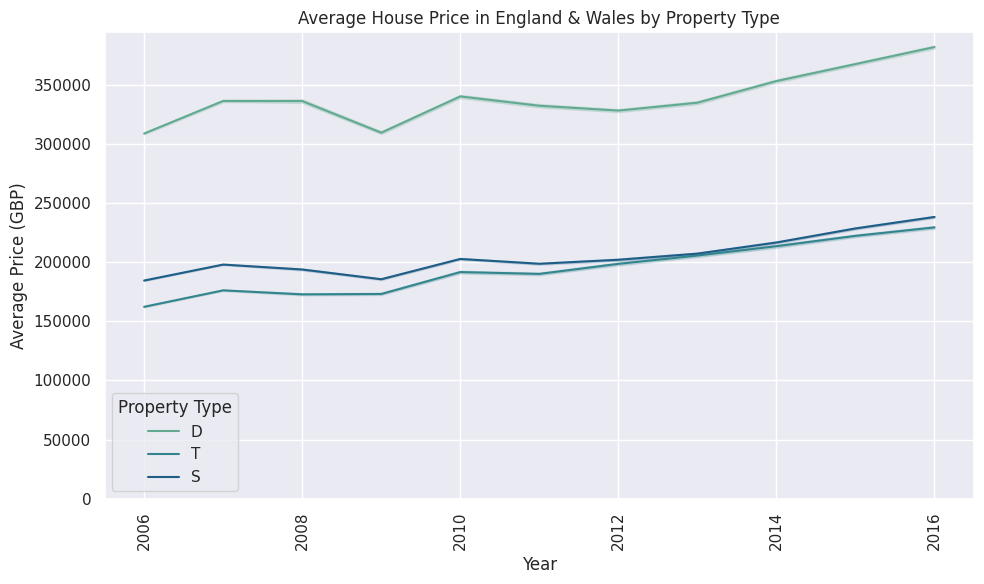

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1, x='Year of Transfer', y='Price', hue='Property Type', palette='crest')
plt.title('Average House Price in England & Wales by Property Type')
plt.xlabel('Year')
plt.ylabel('Average Price (GBP)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0)
plt.show()



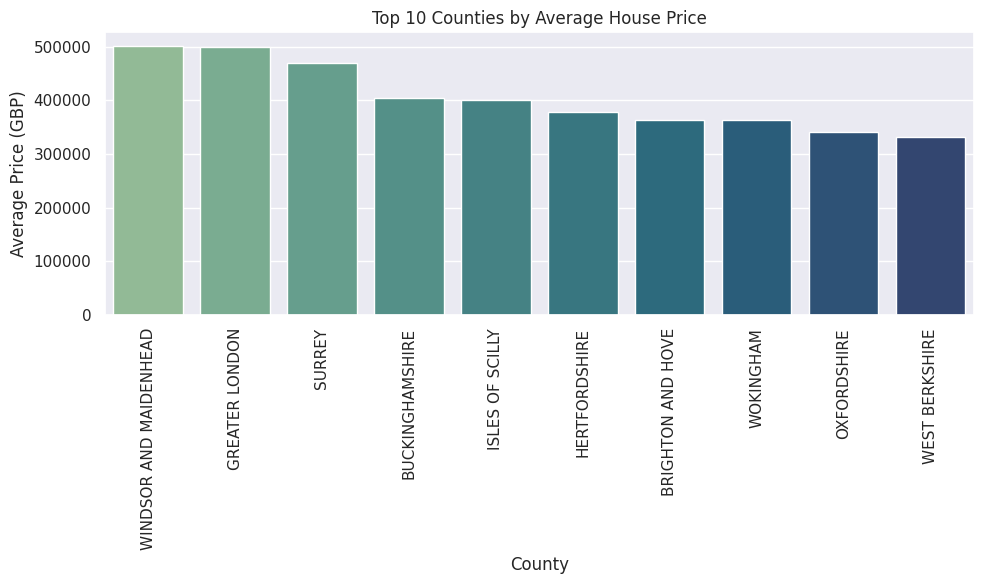

In [16]:
#Group the data by county, find the average price for each county
av_price_bycounty = df1.groupby('County')['Price'].mean().reset_index()
#Sort by descending
av_price_bycounty = av_price_bycounty.sort_values(by='Price', ascending=False)
#I will recall N as the number to be shown on the graph in both highest and lowest graphs
N = 10
top_counties = av_price_bycounty.nlargest(N, 'Price')

# Plot the average house price by county
plt.figure(figsize=(10, 6))
sns.barplot(data=top_counties, x='County', y='Price', palette='crest')

plt.title('Top 10 Counties by Average House Price')

plt.xlabel('County')
plt.ylabel('Average Price (GBP)')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

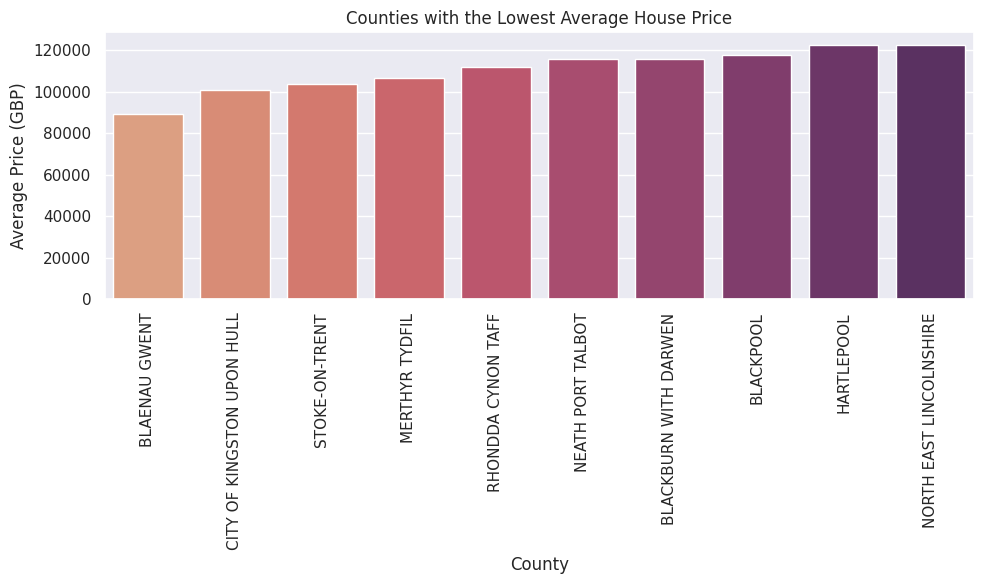

In [17]:
low_counties = av_price_bycounty.nsmallest(N, 'Price')

plt.figure(figsize=(10, 6))
sns.barplot(data=low_counties, x='County', y='Price', palette='flare')

plt.title('Counties with the Lowest Average House Price')

plt.xlabel('County')
plt.ylabel('Average Price (GBP)')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


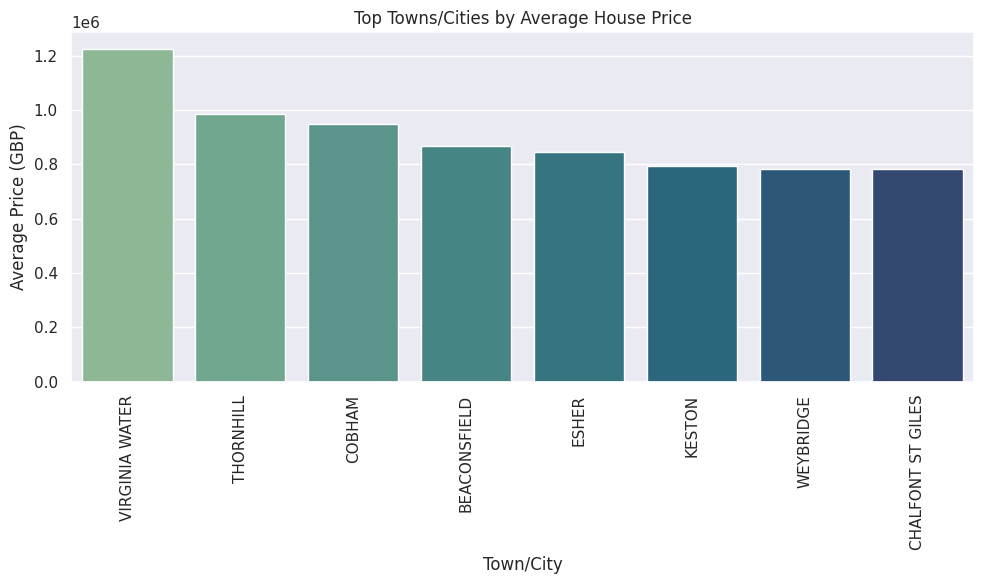

In [24]:
#Group the data by town/city, find the average price for each county
av_price_bytown = df1.groupby('Town/City')['Price'].mean().reset_index()
#Sort by descending
av_price_bytown = av_price_bytown.sort_values(by='Price', ascending=False)
#I will recall N as the number to be shown on the graph in both highest and lowest graphs
N = 8
top_towns = av_price_bytown.nlargest(N, 'Price')

# Plot the average house price by county
plt.figure(figsize=(10, 6))
sns.barplot(data=top_towns, x='Town/City', y='Price', palette='crest')

plt.title('Top Towns/Cities by Average House Price')

plt.xlabel('Town/City')
plt.ylabel('Average Price (GBP)')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

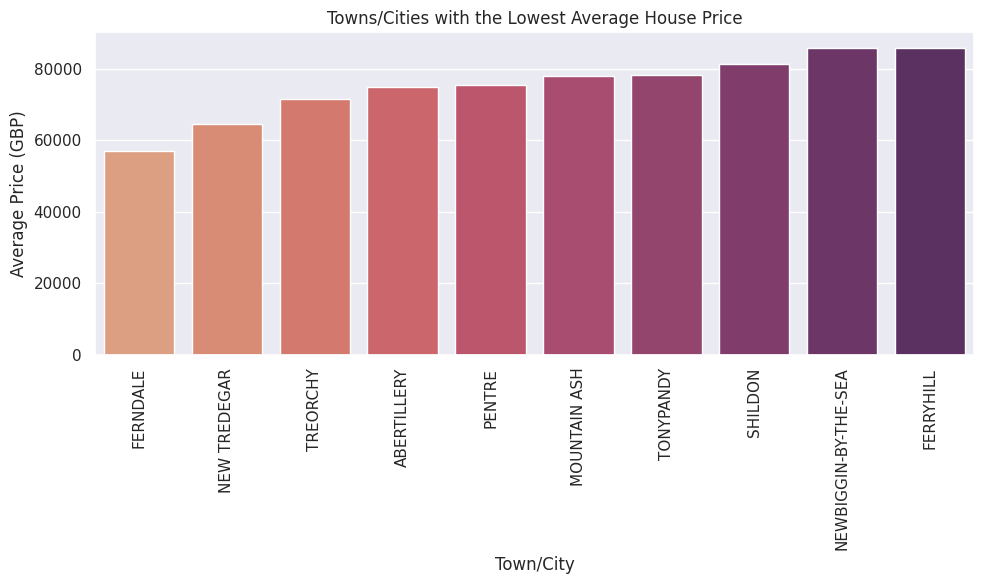

In [19]:
low_towns = av_price_bytown.nsmallest(N, 'Price')

plt.figure(figsize=(10, 6))
sns.barplot(data=low_towns, x='Town/City', y='Price', palette='flare')

plt.title('Towns/Cities with the Lowest Average House Price')

plt.xlabel('Town/City')
plt.ylabel('Average Price (GBP)')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Identifying Property Hotspots

Property hotspots for the purpose of this analysis are areas which have had the greatest % increase in value over the timeframe.

In [47]:
#Identify 10 counties with the highest % increase in price
df2=df1.copy()
df2['Price Increase Percent County'] = df2.groupby('County')['Price'].pct_change()
avg_increase_county = df1.groupby('County')['Price Increase Percent County'].mean()
sorted_avg_increase_county = avg_increase_county.sort_values(ascending=False)
top_counties_increase = sorted_avg_increase_county.head(10)
top_counties_increase = top_counties_increase.reset_index()
#Check
top_counties_increase

,County,Price Increase Percent County
0,GREATER LONDON,1.217081
1,GREATER MANCHESTER,0.785967
2,COUNTY DURHAM,0.493292
3,CHESHIRE EAST,0.457991
4,NORTHUMBERLAND,0.431981
5,LANCASHIRE,0.429703
6,HARTLEPOOL,0.421190
7,CUMBRIA,0.391396
8,POOLE,0.368575
9,RHONDDA CYNON TAFF,0.367991


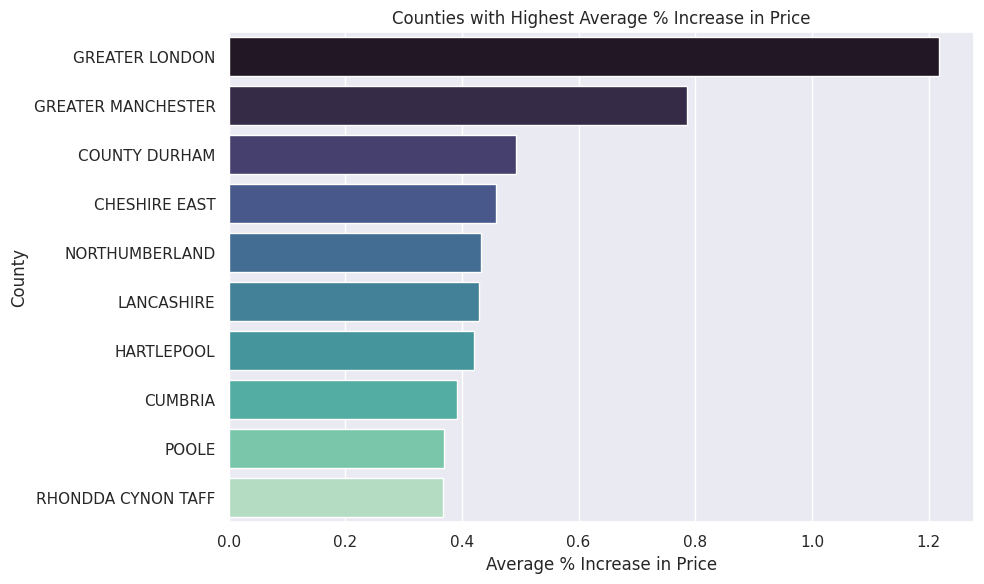

In [48]:
#Plot a horizontal barchart
plt.figure(figsize=(10, 6))
sns.barplot(x='Price Increase Percent County', y='County', data=top_counties_increase, palette='mako')
plt.xlabel('Average % Increase in Price')
plt.ylabel('County')
plt.title('Counties with Highest Average % Increase in Price')
plt.tight_layout()  
plt.show()

In [41]:
#Identify 10 towns with the highest % increase in price
df1['Price Increase Percent'] = df1.groupby('Town/City')['Price'].pct_change()
avg_increase = df1.groupby('Town/City')['Price Increase Percent'].mean()
sorted_avg_increase = avg_increase.sort_values(ascending=False)
top_town_cities = sorted_avg_increase.head(10)
top_town_cities_df = top_town_cities.reset_index()
#Check
top_town_cities_df

,Town/City,Price Increase Percent
0,WEMBLEY,108.498224
1,SALFORD,15.666634
2,RICHMOND,0.992933
3,VIRGINIA WATER,0.900949
4,GRETNA,0.843485
5,LONDON,0.729910
6,MUCH HADHAM,0.600530
7,FERRYHILL,0.579402
8,BURNLEY,0.575540
9,WEYBRIDGE,0.560429


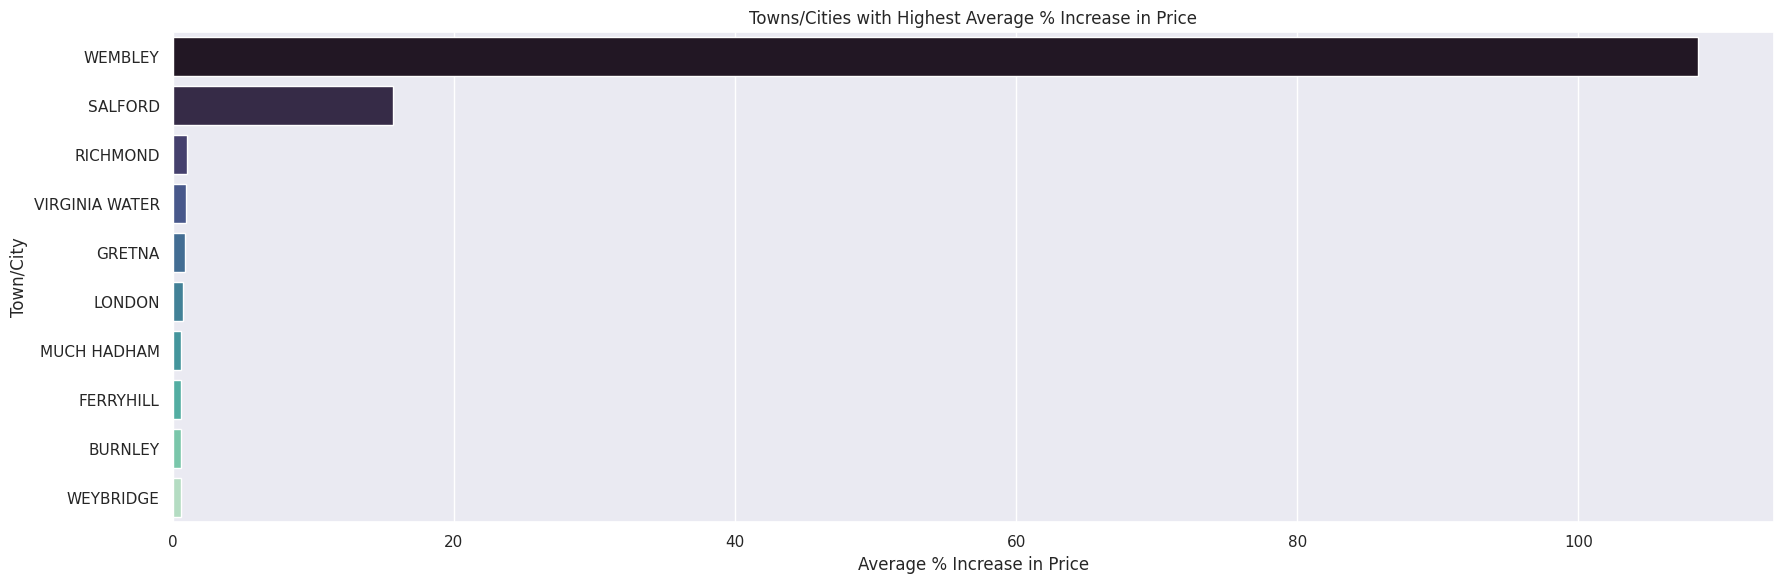

In [42]:
#Plot a horizontal barchart, making it wide as there is a big disparity in average % increase in price
plt.figure(figsize=(18, 6))
sns.barplot(x='Price Increase Percent', y='Town/City', data=top_town_cities_df, palette='mako')
plt.xlabel('Average % Increase in Price')
plt.ylabel('Town/City')
plt.title('Towns/Cities with Highest Average % Increase in Price')
plt.tight_layout()  
plt.show()

## Conclusion

In order to answer the project brief about overall trends and property hotspots, I first inspected then cleansed the data. By extracting the data required from the csv and removing all other columns and rows, I was able to save memory and more efficiently process the calculations and visuals. This was especially important as it is such a large source file.

## How the overall average house price for Engand and Wales has changed over time

As this project is focused on house type, I narrowed down the Property type column to just include detached, semi-detached and terraced. By excluding Other and Flat/Maisonette, I was able to reduce the influence of potential outliers and keep the data relevant to the project.

I chose to use a line chart to display this change over time, as it shows the fluctuations and overall correlation in an easy to follow format.

The line chart shows how the average house price has decreased twice, in 2007 and 2010, but the overall price has increased by £10,000 a year.

## How the average house price for Engand and Wales has changed over time by house type 

Again, I chose to use a line chart to display this change over time, as it shows the fluctuations and overall correlation in an easy to follow format. Each property type is depicted by a line with a different colour and there is a key to easily identify these.

This line chart shows that detached houses have a much higher average house price than both terraced and semi detached, by approx £130,000. The trends of all property types follow the same pattern overall and show that the price has increased by £10,000 a year.

## Average house price by county

## Average house price by town/city


## Property Hotspots

To investigate property hotspots, I decided to look at counties and towns/cities with the biggest average percentage increase over the 10 year period. This would provide an overview and then more specific information.

In order to identify the county property hotspots, I calculated the counties with greatest percentage increase in average price over the 10 year period. Then, I ordered them by percentage increase and took the ten highest.

To visualise this data, I used a horizontal stacked barchart. It presents the data in order of increase and as it is horizonal the county names are easy to read.



## Reflection

Overall, 